In [10]:
# %matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style(theme="onedork", context="notebook", ticks=True, grid=True)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from decimal import Decimal

In [36]:
df = pd.read_pickle(os.path.join("output/test_bf/bf.pkl"))
df = df.apply(pd.Series.explode).reset_index().apply(pd.Series.explode).reset_index()
df['x'] = np.round(df.dn,4)
# df['x'] = df.apply(lambda x: f"{np.round(x['dn'],4)}",axis=1)

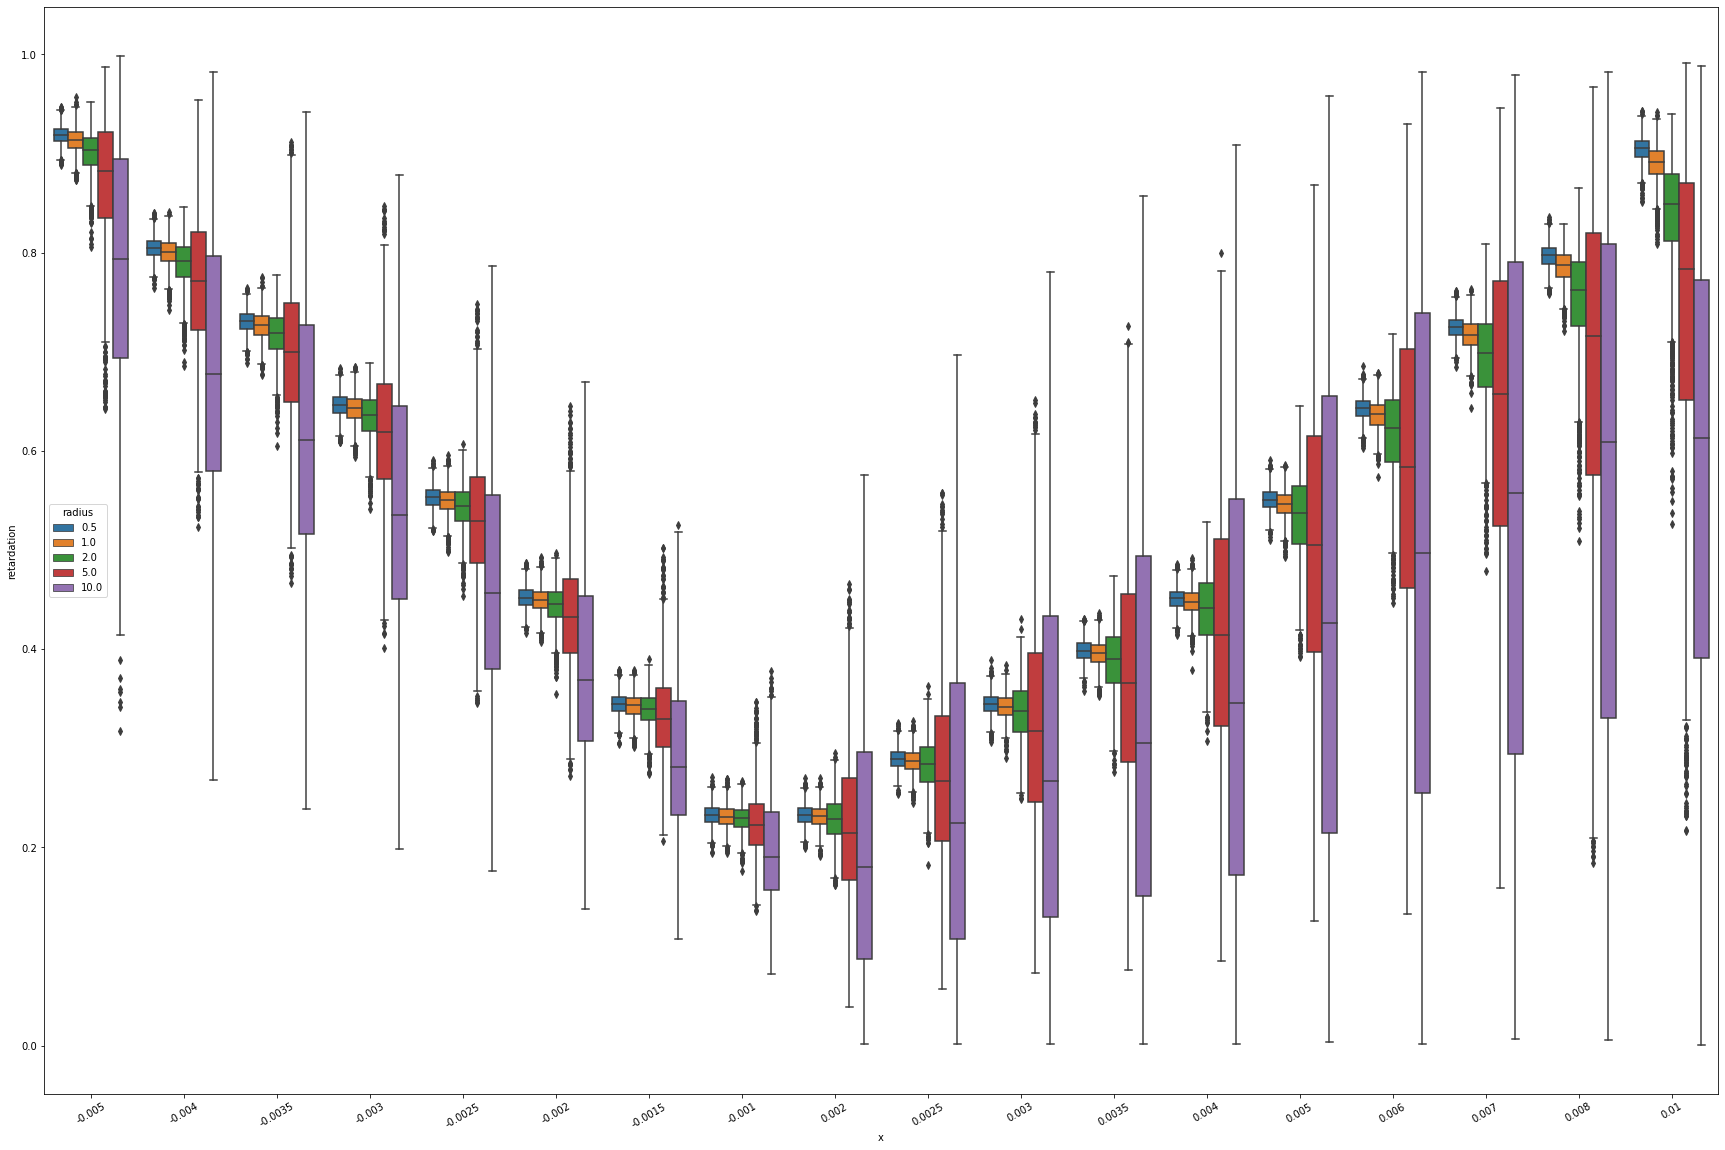

In [37]:
f = plt.figure()
ax = sns.boxplot(x="x", y="retardation", data=df[df.dn%0.0005 == 0], hue = "radius", palette=sns.color_palette())
# ax.ticklabel_format(scilimits=(5,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
f.set_size_inches(30, 20)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(5,5), useMathText=True)
plt.savefig("retardation.pdf", dpi=500)